In [1]:
import os
from os.path import dirname
from pathlib import Path
from typing import List
import json
import math

import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline
import numpy as np

In [2]:
# Two sets of eight models of sizes 70M, 160M, 410M, 1B, 1.4B, 2.8B, 6.9B, and 12B. 
# For each size, there are two models: one trained on the Pile, 
# and one trained on the Pile after the dataset has been globally deduplicated.
# 143 evenly-spaced checkpoints from step1000 to step143000

In [3]:
# run_pythia_mmlu_custom.sh MODEL="EleutherAI/pythia-1b" GPU="4" TASK="mmlu_hs"

In [4]:
# get root directory
root = os.path.abspath('')
while root.split('/')[-1] != 'e2lm-cruise':
    root = dirname(root)

### Get results

In [5]:
# get results
#results_dir = 'examples/metadata_arch/custom_data_selection_results/results_pythia_1b_mmlu_hs/'

#results_dir = 'examples/metadata_arch/custom_data_selection_results/results_pythia_410m_mmlu_hs_cloze/'
#results_dir = 'examples/metadata_arch/custom_data_selection_results/results_pythia_410m_mmlu_adv_cloze/'

#results_dir = 'examples/metadata_arch/custom_data_selection_results/results_pythia_1b_mmlu_hs_cloze/'
#results_dir = 'examples/metadata_arch/custom_data_selection_results/results_pythia_1b_mmlu_adv_cloze/'

#results_dir = 'examples/metadata_arch/custom_data_selection_results/results_pythia_1b_mmlu_easy/'
#results_dir = 'examples/metadata_arch/custom_data_selection_results/results_pythia_1b_mmlu_easy_cloze/'
results_dir = 'examples/metadata_arch/custom_data_selection_results/results_pythia_1b_mmlu_hard/'
#results_dir = 'examples/metadata_arch/custom_data_selection_results/results_pythia_1b_mmlu_hard_cloze/'

In [6]:
results = []
for json_file in sorted(Path(root+'/'+results_dir).glob("**/*.json")):
    with json_file.open() as f:
        results.append(json.load(f))

# results for single task, single model, multiple checkpoints
model_name = results[0]['model_name_sanitized']
task = list(results[0]['group_subtasks'].keys())[0]

print(model_name, task)

EleutherAI__pythia-1b mmlu_hard


In [7]:
# collect data

steps = []
accuracies = []
error_bars = []


for checkpoint in results:
    
    # checkpoint
    step = checkpoint['configs'][task]['metadata']['revision']
    step = int(step.split('step')[-1])
    steps.append(step)
    
    # results
    values = checkpoint['results'][task]
    acc = values['acc,none']
    stderr = values['acc_stderr,none']
    accuracies.append(acc)
    error_bars.append(stderr)

#### Smoothing function

In [8]:
# EMA
def smooth_tf(scalars: list[float], weight: float) -> list[float]:
    """
    EMA implementation according to
    https://github.com/tensorflow/tensorboard/blob/34877f15153e1a2087316b9952c931807a122aa7/tensorboard/components/vz_line_chart2/line-chart.ts#L699
    """
    last = 0
    smoothed = []
    num_acc = 0
    for next_val in scalars:
        last = last * weight + (1 - weight) * next_val
        num_acc += 1
        # de-bias
        debias_weight = 1
        if weight != 1:
            debias_weight = 1 - math.pow(weight, num_acc)
        smoothed_val = last / debias_weight
        smoothed.append(smoothed_val)

    return smoothed

### Plot

#### Filter mmlu val based on HS and more advanced topics

#### MCQ format

#### pythia-1b mmlu_hs

/tmp/ipykernel_2731289/3507742912.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


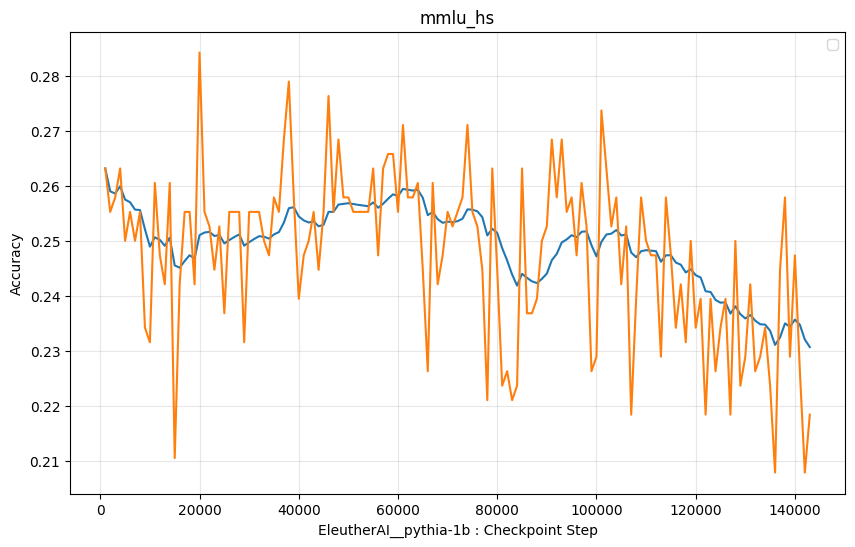

In [52]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Add labels and title
ax.set_xlabel('{} : Checkpoint Step'.format(model_name))
ax.set_ylabel('Accuracy')
ax.set_title(task)
ax.legend()
ax.grid(True, alpha=0.3)

ax.plot(steps, smooth_tf(accuracies, .9), label="acc smooth") 
ax.plot(steps, accuracies, label="acc")  
plt.show()

#### Coze format

#### pythia-410m mmlu_hs_cloze

/tmp/ipykernel_2731289/3507742912.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


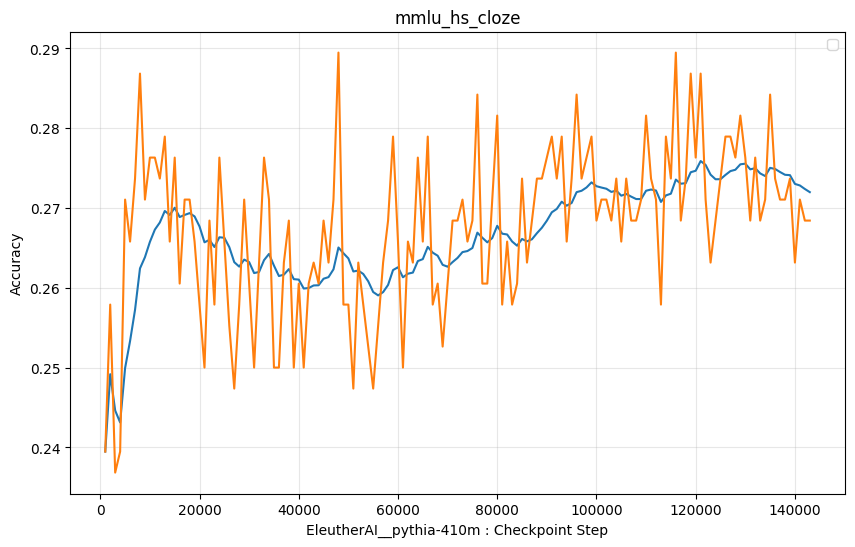

In [57]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Add labels and title
ax.set_xlabel('{} : Checkpoint Step'.format(model_name))
ax.set_ylabel('Accuracy')
ax.set_title(task)
ax.legend()
ax.grid(True, alpha=0.3)

ax.plot(steps, smooth_tf(accuracies, .9), label="acc smooth") 
ax.plot(steps, accuracies, label="acc")  
plt.show()

#### pythia-410m mmlu_adv_cloze

/tmp/ipykernel_2731289/3507742912.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


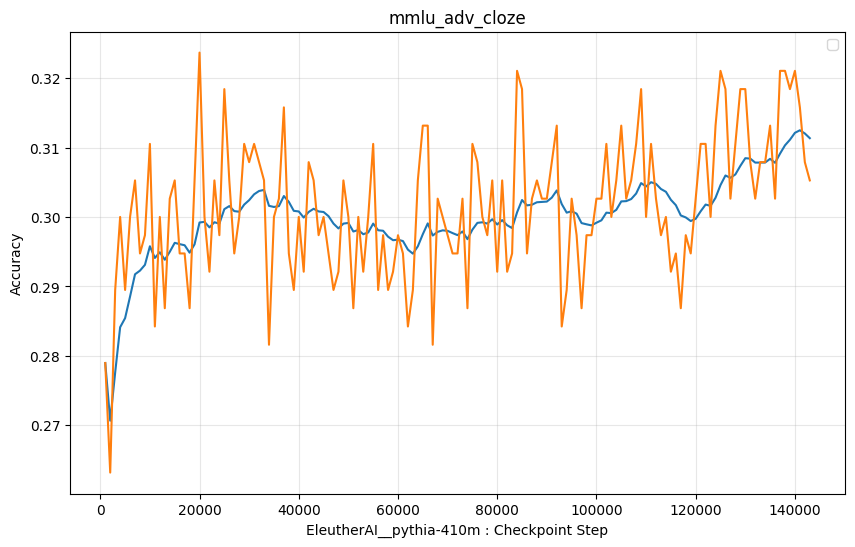

In [62]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Add labels and title
ax.set_xlabel('{} : Checkpoint Step'.format(model_name))
ax.set_ylabel('Accuracy')
ax.set_title(task)
ax.legend()
ax.grid(True, alpha=0.3)

ax.plot(steps, smooth_tf(accuracies, .9), label="acc smooth") 
ax.plot(steps, accuracies, label="acc")  
plt.show()

#### pythia-1b mmlu_hs_cloze

/tmp/ipykernel_3210610/3507742912.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


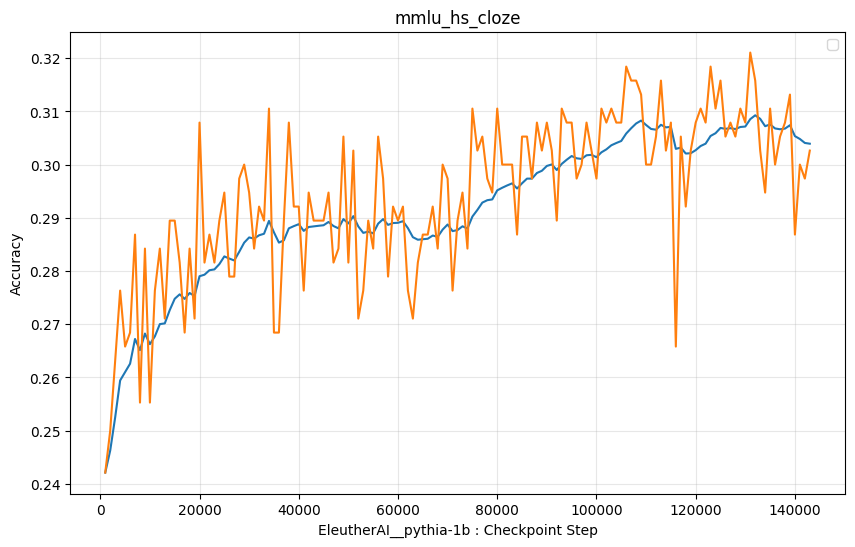

In [9]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Add labels and title
ax.set_xlabel('{} : Checkpoint Step'.format(model_name))
ax.set_ylabel('Accuracy')
ax.set_title(task)
ax.legend()
ax.grid(True, alpha=0.3)

ax.plot(steps, smooth_tf(accuracies, .9), label="acc smooth") 
ax.plot(steps, accuracies, label="acc")  
plt.show()

#### pythia-1b mmlu_adv_cloze

/tmp/ipykernel_3210610/3507742912.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


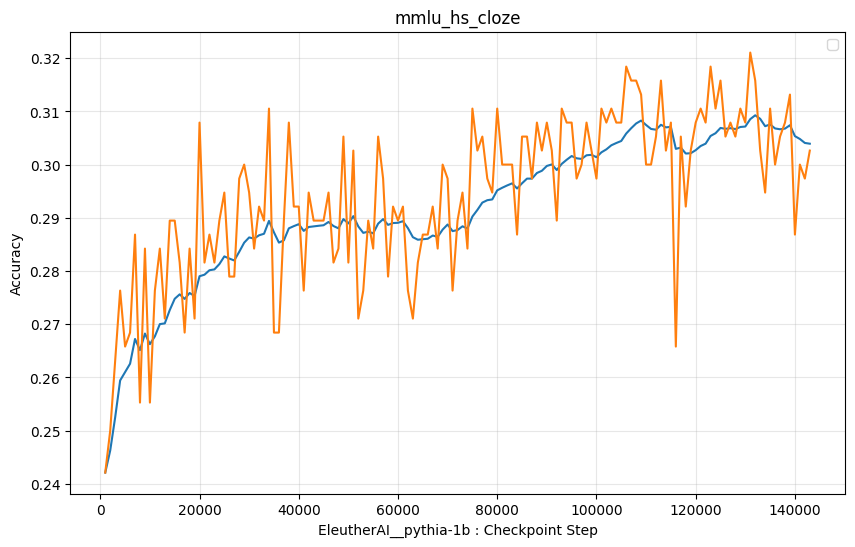

In [11]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Add labels and title
ax.set_xlabel('{} : Checkpoint Step'.format(model_name))
ax.set_ylabel('Accuracy')
ax.set_title(task)
ax.legend()
ax.grid(True, alpha=0.3)

ax.plot(steps, smooth_tf(accuracies, .9), label="acc smooth") 
ax.plot(steps, accuracies, label="acc")  
plt.show()

#### Filter mmlu val based on GPT-4o : Easy or difficult for high school students

#### MCQ format

#### pythia-1b mmlu_easy

/tmp/ipykernel_3943048/3507742912.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


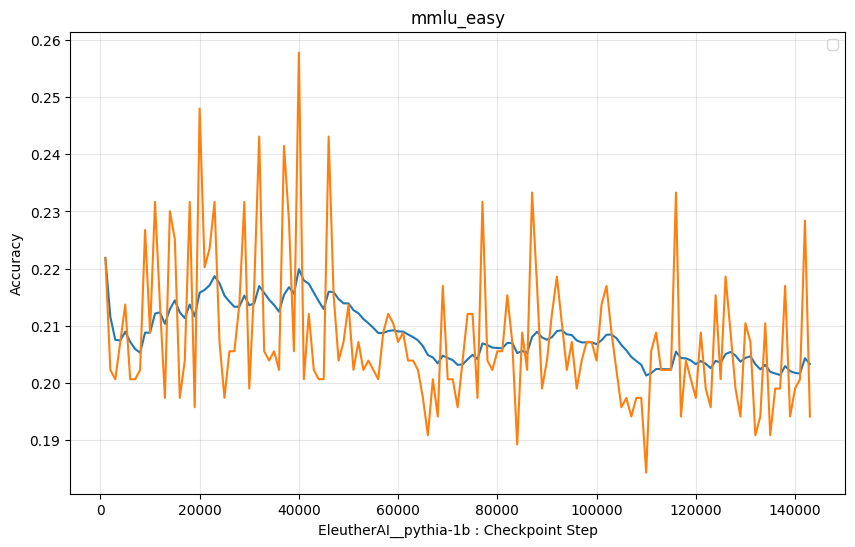

In [11]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Add labels and title
ax.set_xlabel('{} : Checkpoint Step'.format(model_name))
ax.set_ylabel('Accuracy')
ax.set_title(task)
ax.legend()
ax.grid(True, alpha=0.3)

ax.plot(steps, smooth_tf(accuracies, .9), label="acc smooth") 
ax.plot(steps, accuracies, label="acc")  
plt.show()

#### pythia-1b mmlu_easy_cloze

/tmp/ipykernel_3210610/3507742912.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


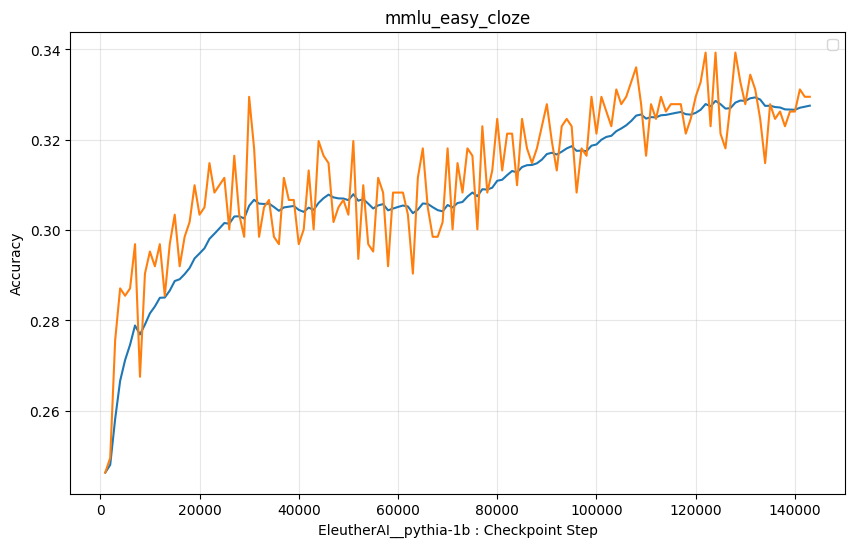

In [18]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Add labels and title
ax.set_xlabel('{} : Checkpoint Step'.format(model_name))
ax.set_ylabel('Accuracy')
ax.set_title(task)
ax.legend()
ax.grid(True, alpha=0.3)

ax.plot(steps, smooth_tf(accuracies, .9), label="acc smooth") 
ax.plot(steps, accuracies, label="acc")  
plt.show()

#### pythia-1b mmlu_hard_cloze

/tmp/ipykernel_4069025/3507742912.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


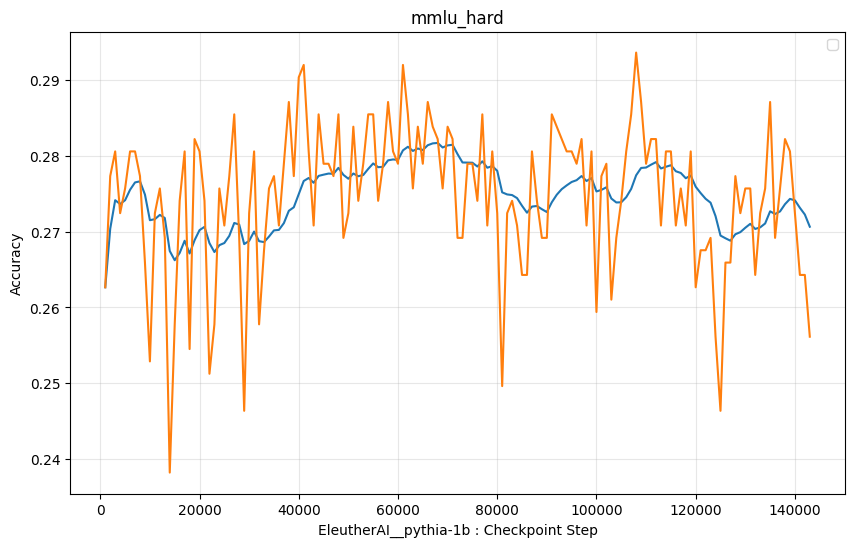

In [9]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Add labels and title
ax.set_xlabel('{} : Checkpoint Step'.format(model_name))
ax.set_ylabel('Accuracy')
ax.set_title(task)
ax.legend()
ax.grid(True, alpha=0.3)

ax.plot(steps, smooth_tf(accuracies, .9), label="acc smooth") 
ax.plot(steps, accuracies, label="acc")  
plt.show()

#### pythia-1b mmlu_hard_cloze

/tmp/ipykernel_3943048/3507742912.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


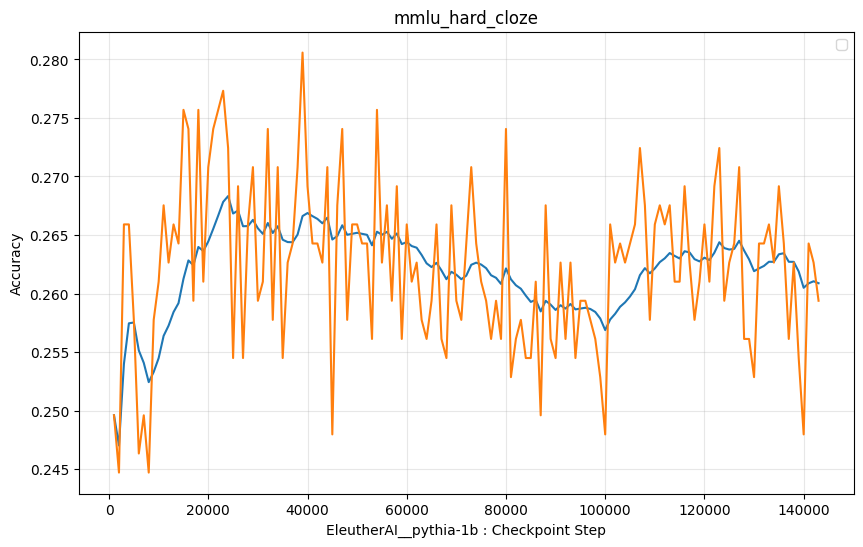

In [16]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Add labels and title
ax.set_xlabel('{} : Checkpoint Step'.format(model_name))
ax.set_ylabel('Accuracy')
ax.set_title(task)
ax.legend()
ax.grid(True, alpha=0.3)

ax.plot(steps, smooth_tf(accuracies, .9), label="acc smooth") 
ax.plot(steps, accuracies, label="acc")  
plt.show()

In [17]:
# both task format and data selection seems to have an effect on monotonicity
# need to calculate monotonicity and auto-correlation scores